# Интерполационна формула на Нютон. Някои практически въпроси, свързани с интерполацията.

### Задача 1

Да се напише функция _divided_difference(nodes, values)_, където _nodes_ е списък с точки от реалната права, а _values_ -- списък с реални стойности. Функцията да изчислява разделената разлика на функция със стойности _values_ в точките _nodes_.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def divided_difference(nodes, values):
    if(nodes.size == 1):
        return values[0]
    else:
        return (divided_difference(nodes[1 : ], values[1 : ]) - divided_difference(nodes[ : -1], values[ : -1])) / (nodes[-1] - nodes[0])

In [66]:
#how to use it
def f(x):
    return np.sqrt(x) + (3 * x**2) - x + 2

x0 = 0
x1 = 1
x2 = 4
nodes = np.array([x0, x1, x2])

y0 = f(x0)
y1 = f(x1)
y2 = f(x2)
values = np.array([y0, y1, y2])

result = divided_difference(nodes, values)
print("Divided difference:", result)

Divided difference: 2.8333333333333335


### Задача 2
Да се напише функция *newton_poly(nodes, values, x)*, която връща интерполационния полином на Лагранж, с възли _nodes_ и съответни стойности _values_.

In [68]:
def newton_poly(nodes, values, x):
    poly = 0
    mult = 1
    for k in range(nodes.size):
        poly += (divided_difference(nodes[ : k + 1], values[ : k + 1]) * mult)
        mult *= (x - nodes[k])
    return poly

In [116]:
import numpy as np
import sympy
x = sympy.Symbol('x')
def newton_poly(nodes, values, x):
    len_nodes = len(nodes)
    expr = 0
    for i in range(len_nodes):
        number = divided_difference(nodes[:i+1], values[:i+1])
        term = number
        for j in range(i):
            term *= (x - nodes[j])
        expr += term
    return expr

result = divided_difference([x0, x1, x2], [y0, y1, y2])
print("Divided difference:", result)

expr = newton_poly([x0, x1, x2], [y0, y1, y2], x)
print("Newton Polynomial:", expr)

Divided difference: 2.8333333333333335
Newton Polynomial: 2.83333333333333*x*(x - 1) + 3.0*x + 2.0


### Задача 3
В таблицата са дадени данни за населението на САЩ в периода 1920-1990. Да се построи
полином от седма степен, интерполиращ таблицата. Да се даде приближение на населението
през 1952, 1974, 2000 година и да се сравни с действителните стойности --
съответно 157 млн., 214 млн., 281.42 млн.


| Година| 1920 | 1930 | 1940 | 1950 | 1960 | 1970 | 1980 | 1990 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Население | 106.46 | 123.08 | 132.12 | 152.27 | 180.67 | 205.05 | 227.23 | 249.46 |


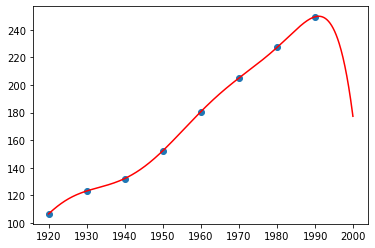

In [72]:
nodes = np.array([1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990])
values = np.array([106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46])

def divided_difference(nodes, values):
    if(nodes.size == 1):
        return values[0]
    else:
        return (divided_difference(nodes[1 : ], values[1 : ]) - divided_difference(nodes[ : -1], values[ : -1])) / (nodes[-1] - nodes[0])

def newton_poly(nodes, values, x):
    poly = 0
    mult = 1
    for k in range(nodes.size):
        poly += (divided_difference(nodes[ : k + 1], values[ : k + 1]) * mult)
        mult *= (x - nodes[k])
    return poly
    
def poly1(x):
    return newton_poly(nodes, values, x)

x = np.arange(1920, 2000, 0.1)
plt.scatter(nodes, values)
plt.plot(x, poly1(x), color='r')
plt.show()

In [83]:
#1952, 1974, 2000
#157 млн., 214 млн., 281.42

def absolute_error(x, year):
    return np.abs(x - poly1(year))

result1 = absolute_error(157, 1952)
result2 = absolute_error(214, 1974)
result3 = absolute_error(281.42, 2000)

print(poly1(1952))
print(poly1(1974))
print(poly1(2000))

157.72802626559996
213.51053127680007
175.08000000000226


In [176]:
import sympy as sp
n = 7

years = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]
population = [106.46, 123.08, 132.12, 152.27, 180.67, 205.05, 227.23, 249.46]
x = sympy.Symbol('x')

newton_polynomial = sp.simplify(newton_poly(years, population, x))
#print("Интерполационен полином на Нютон от седма степен:")
#sp.pprint(newton_polynomial)

years_to_estimate = [1952, 1974, 2000]
estimated_populations = [newton_polynomial.subs(x, year) for year in years_to_estimate]
print(estimated_populations)

actual_popilations = [157, 214, 281.42]

for i, year in enumerate(years_to_estimate):
    estimated = estimated_populations[i]
    actual = actual_popilations[i]
    print(f"\nГодина: {year}")
    print(f"Изчислено население: {estimated} млн.")
    print(f"Действително население: {actual} млн.")
    print(f"Разлика: {abs(estimated - actual)} млн.")

[158.500000000000, 214.500000000000, 175.500000000000]

Година: 1952
Изчислено население: 158.500000000000 млн.
Действително население: 157 млн.
Разлика: 1.50000000000000 млн.

Година: 1974
Изчислено население: 214.500000000000 млн.
Действително население: 214 млн.
Разлика: 0.500000000000000 млн.

Година: 2000
Изчислено население: 175.500000000000 млн.
Действително население: 281.42 млн.
Разлика: 105.920000000000 млн.


### Задача 4

Дадена е функцията на Рунге $ f(x)=\dfrac{1}{1+25x^2}$. Да се приближи $ f(x) $ в интервала $x \in [-1,1],$ като се използват интерполационни полиноми от степени 10 и 4 с равноотдалечени възли. 
Да се построят графиките на всеки от полиномите, заедно с графиката на функцията в една координатна система, както и графиките на абсолютната грешка по модул в двата случая.


In [101]:
import sympy

x = sympy.Symbol('x')

def f(x):
    return 1 / (1 + 25 * (x ** 2))

x_axis4 = np.linspace(-1, 1, 5)
x_axis10 = np.linspace(-1, 1, 11)

def poly4(x):
    return newton_poly(x_axis4, f(x_axis4), x)
def poly10(x):
    return newton_poly(x_axis10, f(x_axis10), x)

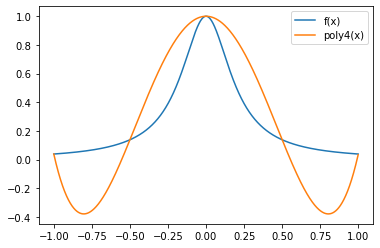

In [103]:
x = np.arange(-1, 1 ,0.001)
plt.plot(x ,f(x))
plt.plot(x, poly4(x))
plt.legend(['f(x)','poly4(x)'])
plt.show()

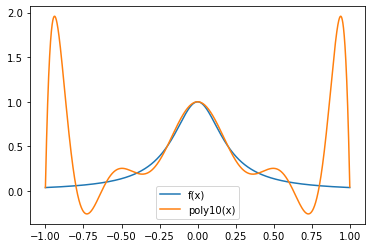

In [107]:
x=np.arange(-1, 1, 0.0001)
plt.plot(x, f(x))
plt.plot(x, poly10(x))
plt.legend(['f(x)','poly10(x)'])
plt.show()

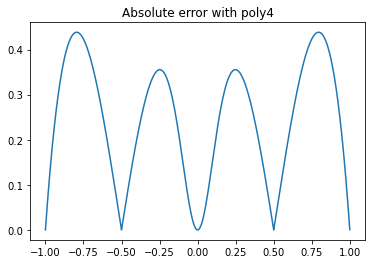

In [112]:
plt.plot(x, np.abs(f(x) - poly4(x)))
plt.title('Absolute error with poly4')
plt.show()

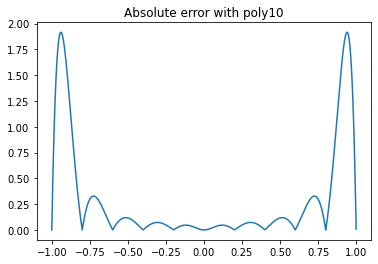

In [116]:
plt.plot(x, np.abs(f(x) - poly10(x)))
plt.title('Absolute error with poly10')
plt.show()

### Задача 5

Известно е (вж. лекции), че най-добрите възли за интерполация в интервала $[-1,1]$ са т.нар. Чебишови възли, които се задават по формулата:

$\xi_k = \cos \left( \dfrac{2k-1}{2n} \pi \right), k=1,\dots,n$


Да се построи интерполационен полином от 10-та степен за функцията на Рунге, като за целта се използват съответните Чебишови възли в интервала $[-1,1]$. Да се построи графика на абсолютната грешка.

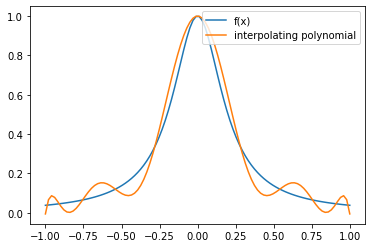

In [150]:
def f(x):
    return 1 / (1 + 25 * x**2)
    
n = 11

chebyshev_nodes = np.empty(n)
for k in range(n):
    chebyshev_nodes[k] = np.cos((2 * (k + 1) - 1) / (2 * n) * np.pi)

chebyshev_values = f(chebyshev_nodes)

def poly10(x):
    return newton_poly(chebyshev_nodes, chebyshev_values, x)

x = np.linspace(-1, 1, 100)
plt.plot(x, f(x))
plt.plot(x, newton_poly(chebyshev_nodes, chebyshev_values, x))
plt.legend(['f(x)','interpolating polynomial'])
plt.show()

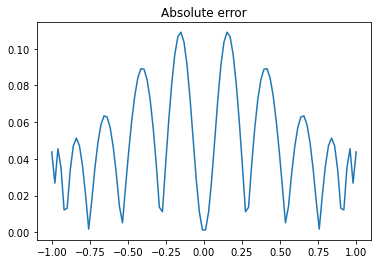

In [152]:
plt.plot(x, np.abs(f(x) - poly10(x)))
plt.title('Absolute error')
plt.show()

### Задача 6

Проведени са експерименти за определяне бързодействието на един алгоритъм за сортиране в зависимост от броя входни елементи. Резултатите са представени в следната таблица:


| Брой елементи (x1000) | 10 | 20 | 50 | 100 | 150 | 200 | 250 |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Време (сек.) | 0.163928 | 0.53282 | 3.00007 | 11.2078 | 26.7487 | 47.3297 | 76.8061 |

Да се определи приблизително колко елемента могат да се сортират за 30 сек.

In [164]:
#this is wrong because the intervals aren't equally - divided
elements = np.array([10, 20, 50, 100, 150, 200, 250])
time = np.array([0.163928, 0.53282, 3.00007, 11.2078, 26.7487, 47.3297, 76.8061])

def wrong(x):
    return newton_poly(time, elements, x)

print(wrong(30))

0.3275728261445181


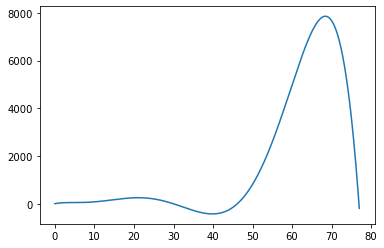

In [167]:
x_axis = np.linspace(0, 77, 1000)
plt.plot(x_axis, wrong(x_axis))
plt.show()

In [170]:
# SymPy is a Python library for symbolic computations
from sympy import Symbol, expand, Eq, solve

x = Symbol('x')
left_part = expand(newton_poly(elements, time, x))

equation = Eq(left_part, 30)
sol = solve(equation, x)
print(sol)

[-59.2372258204670, 158.463886561511, 19.0353604249825 - 118.902227037914*I, 19.0353604249825 + 118.902227037914*I, 258.811310015336 - 91.415888526688*I, 258.811310015336 + 91.415888526688*I]


In [173]:
expand(newton_poly(elements, time, x))

2.90514711714253e-12*x**6 - 1.90263895467021e-9*x**5 + 4.51166858336103e-7*x**4 - 4.65622120757951e-5*x**3 + 0.00317674920264755*x**2 - 0.0320157148523016*x + 0.208648130499045